# Spirograph Documentation
Spirograph enables the creation of common climate data plots.

## Table of contents
1. Overview
2. User Guide
3. Extending spirograph
4. Functions

# 1. Overview

Spirograph is a dictionary-based function interface that wraps [Matplotlib](https://matplotlib.org/) and [Xarray](https://docs.xarray.dev/en/stable/) plotting functions to create common climate data plots. Its inputs are most commonly xarray DataArrays or Datasets, and it is best used when these arrays are the output of workflows incorporating [Xscen](https://github.com/Ouranosinc/xscen) and/or [Xclim](https://xclim.readthedocs.io/en/stable/). Style-wise, the plots follow the general guidelines offered by the [IPCC visual style guide 2022](https://www.ipcc.ch/site/assets/uploads/2022/09/IPCC_AR6_WGI_VisualStyleGuide_2022.pdf), but aim to create a look that could be distinctively associated with [Ouranos](https://www.ouranos.ca/en). The [Spirograph Github repository](https://github.com/Ouranosinc/spirograph) hosts the files needed to install the package, as well as the dependencies and requirements.

Spirograph currently includes the following functions:

1. **timeseries()**: Creates time series as line plots.
2. **gridmap()**: Plots gridded georeferenced data on a map.

The following features are also included in the package:

* Automatically recognizes some common data structures (e.g. climate ensembles) using variable and coordinate names and creates the appropriate plots.
* Automatically links attributes from xarray objects to plot elements (title, axes), with customization options.
* Automatically assigns colors to some common variables and, following the IPCC visual guidelines.
* Provides options to visually enhance the plots, and includes a default style to ensure coherence when creating multiple plots.
* Returns a [matplotlib axes object](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) that is fully customizeable through matplotlib functions and methods.


# 2. User Guide

## Preparing the data

Spirograph only accepts [xarray DataArrays or Datasets](https://docs.xarray.dev/en/stable/user-guide/data-structures.html) as data inputs. As a general rule, spirograph functions will not accomplish any data processing or cleaning tasks - the object(s) passed to the functions should therefore only contain the data that will appear on the graph and the metadata that supports it.

To create, for instance, a time series plot from a NetCDF file, the following preparation steps have to be taken:

In [1]:
#import
import xarray as xr
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}
import matplotlib.pyplot as plt
import numpy as np

import spirograph.matplotlib as sp

In [2]:
# create xarray object from a NetCDF
url = 'https://pavics.ouranos.ca//twitcher/ows/proxy/thredds/dodsC/birdhouse/disk2/cccs_portal/indices/Final/BCCAQv2_CMIP6/tx_max/YS/ssp585/ensemble_percentiles/tx_max_ann_BCCAQ2v2+ANUSPLIN300_historical+ssp585_1950-2100_30ymean_percentiles.nc'
opened = xr.open_dataset(url, decode_timedelta=False)

# select a location
ds_time = opened.isel(lon=500, lat=250)
# select only the variables containing the data to be plotted
ds_time = ds_time[['tx_max_p50', 'tx_max_p10', 'tx_max_p90']]

ds_time

<xarray.Dataset>
Dimensions:     (time: 13)
Coordinates:
    horizon     (time) |S64 ...
    lat         float64 61.87
    lon         float64 -99.29
  * time        (time) datetime64[ns] 1951-01-01 1961-01-01 ... 2071-01-01
Data variables:
    tx_max_p50  (time) float32 ...
    tx_max_p10  (time) float32 ...
    tx_max_p90  (time) float32 ...
Attributes: (12/28)
    ccdp_name:               tx_max
    description:             30 year mean Annual minimum of daily maximum tem...
    history:                 [2022-04-28 05:01:36] : Computation of the perce...
    long_name:               30 year mean Maximum daily maximum temperature
    standard_name:           air_temperature
    units:                   degC
    ...                      ...
    target_dataset:          ANUSPLIN interpolated Canada daily 300 arc secon...
    target_dataset_id:       ANUSPLIN300
    target_institute_id:     CFS-NRCan
    target_institution:      Canadian Forest Service, Natural Resources Canada
    target_references:       McKenney, D.W., Hutchinson, M.F., Papadopol, P.,...
    target_version:          obtained: 2 April 2012, 14 June 2012, and 30 Jan...

## Using the Ouranos matplotlib stylesheet

Most parameters affecting the style of plots can be set through matplotlib stylesheets. Spirograph includes custom stylesheets that can be accessed through the set_mpl_style() function. Paths to your own stylesheets ('.mplstyle' extension) can also be passed to this function. To use the built-in matplotlib styles, use `mpl.style.use()`.

The currently available stylesheets are as follows:

* ouranos: General stylesheet, including default colors.

In [3]:
# use ouranos style
sp.utils.set_mpl_style('ouranos')

## Creating simple time series plots

The [**timeseries()**](#timeseries) function accepts DataArrays or Datasets. When only one object is passed to the function, using a dictionary is optional. Selecting one of the variables from our Dataset creates a DataArray (one line).

<AxesSubplot:title={'left':'30 year mean Annual minimum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

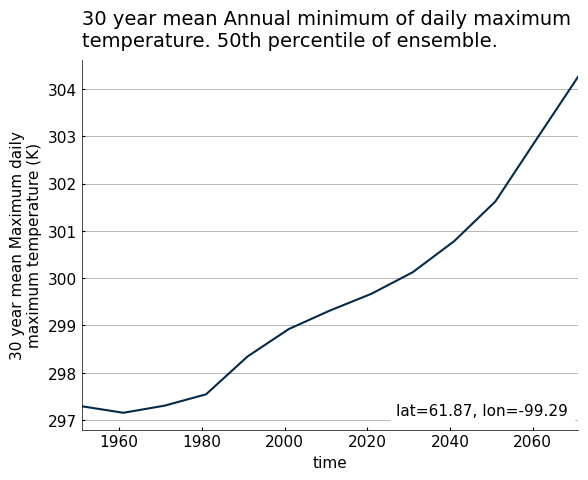

In [4]:
sp.plot.timeseries(ds_time.tx_max_p50)

## Using the dictionary interface

The main elements of a plot are dependent on four arguments, each accepting dictionaries:

1. `data` : a dictionary containing the Xarray objects and their respective keys, used as labels on the plot.
2. `use_attrs`: a dictionary linking attributes from the Xarray object to plot text elements.
3. `fig_kw`: a dictionary to pass arguments to the `plt.figure()` instance.
4. `plot_kw` : a dictionary using the same keys as `data` to pass arguments to the underlying plotting function, in this case [matplotlib.axes.Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

When labels are passed in `data`, any 'label' argument passed in `plot_kw` will be ignored.

<AxesSubplot:title={'left':'30 year mean Annual minimum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='time', ylabel='air_temperature (K)'>

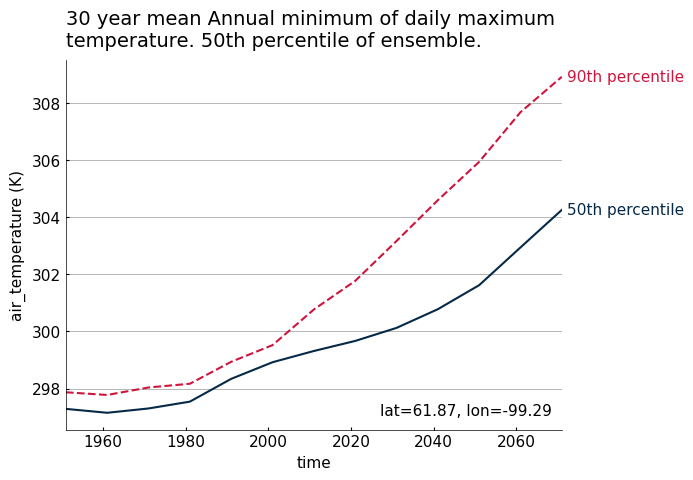

In [5]:
my_data = {'50th percentile': ds_time.tx_max_p50, '90th percentile': ds_time.tx_max_p90}
my_attrs = {'ylabel': 'standard_name'} # will look for an attribute 'standard name' in the first entry of my_data
plot_kws = {'90th percentile': {'linestyle': '--'}}

sp.plot.timeseries(my_data, use_attrs = my_attrs, plot_kw = plot_kws, legend='edge') # fun legend option

## Line plots with Datasets

When Datasets are passed to the timeseries function, certain names and data configurations will be recognized and will result in certain kinds of plots.

| Dataset configuration | Resulting plot | Notes |
|:----------:|:--------------:|:----------------:|
|Variables contain a substring of the format "\_pNN", where N are numbers|Shaded line graph with the central line being the middle percentile|
|Contains a dimension named "percentiles"|Shaded line graph with the central line being the middle percentile| Behaviour is shared with DataArrays containing the same dimension.|
|Variables contain "min" and "max" and "mean" (can be capitalized) |Shaded line graph with the central line being the mean|
|Contains a dimension named "realization"|Line graph with one line per realization | When plot_kw is specified, all realizations within the Dataset will share one style.  Behaviour is shared with DataArrays containing the same dimension.|
|Any other Dataset| Line graph with one line per variable||



<AxesSubplot:title={'left':'30 year mean Annual minimum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

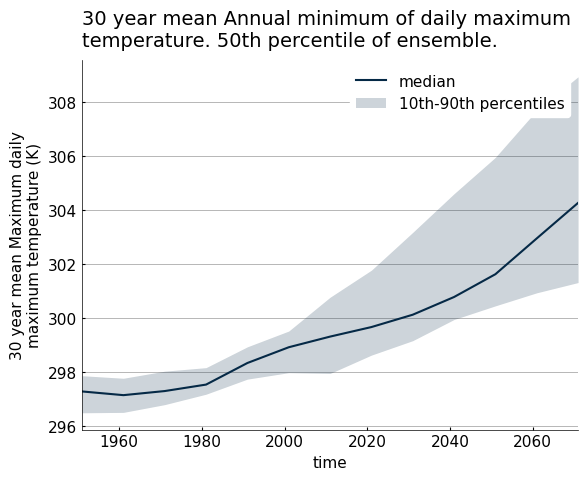

In [6]:
# Using 'median' as a key to make it the line label in the legend.
# legend='full' will create a legend entry for the shaded area
sp.plot.timeseries({'median': ds_time}, legend='full', show_lat_lon=False)

Whenever multiple lines are plotted from a single Dataset, their legend label will be the concatenation of the Dataset name (its key in the `data` arg.) and the name of the variables or coordinates from which the data is taken, unless the Dataset is passed to the function without a dictionary. When all lines from a Dataset have the same appearance, only the Dataset label will be shown. 

<AxesSubplot:title={'left':'30 year mean Annual minimum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

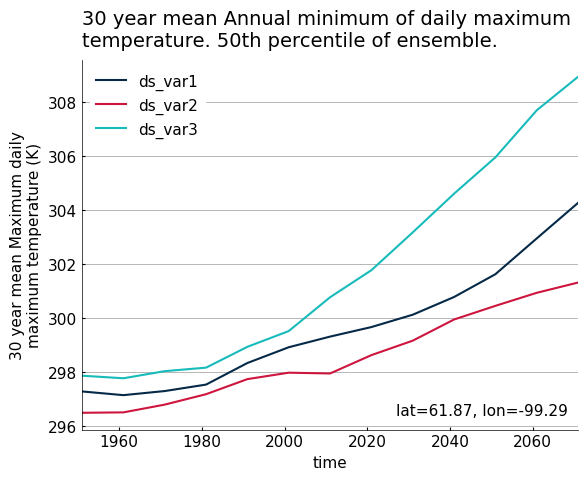

In [7]:
#Create a Dataset with different names as to not trigger the shaded line plot
ds_mod = ds_time.copy()
ds_mod = ds_mod.rename({'tx_max_p50': 'var1','tx_max_p10': 'var2','tx_max_p90': 'var3'})

sp.plot.timeseries({'ds':ds_mod})

## Keyword - color association

Following the IPCC visual style guidelines and the practices of many other climate organizations, some scenarios (RCPs, SSPs), models and projects (CMIPs) are associated with specific colors. These colors can be implemented in timeseries() through the keys of the `data` argument. If a formulation of such scenarios or model names is found in a key, the corresponding line will be given the appropriate color. For scenarios, alternative formats such as _ssp585_ or _rcp45_ are also accepted instead of the more formal _SSP5-8.5_ on _RCP4.5_. Model names do not currently have this flexibility. If multiple matching substrings exist, the following order of priority will dictate which color is used:

1. SSP scenarios
2. RCP scenarios
3. Model names
4. CMIP5 or CMIP6

A list of the accepted substrings and colors is shown below.

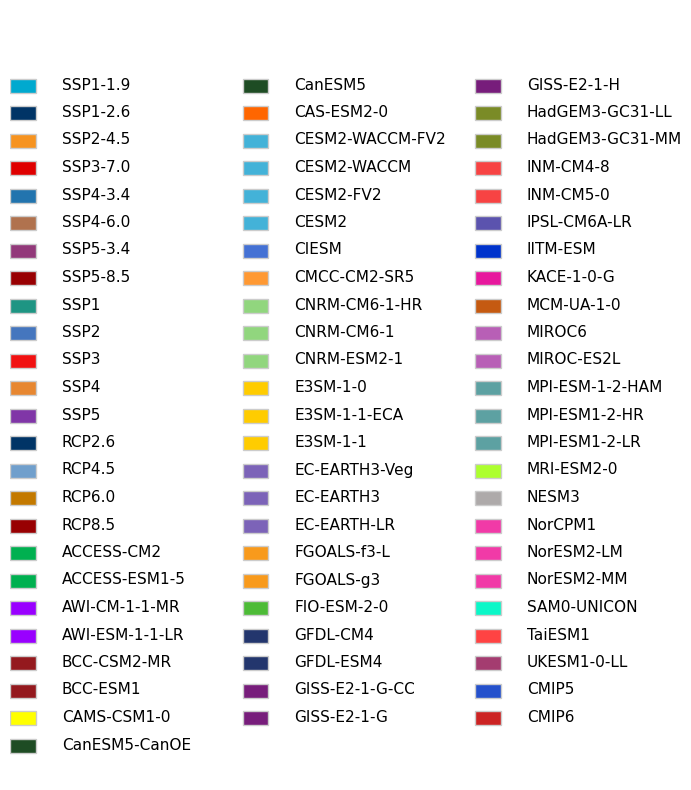

In [8]:
from matplotlib.patches import Rectangle

color_dict = sp.utils.categorical_colors()

keys = np.array(list(color_dict.keys()))
keys = np.array_split(keys, 3)


fig, ax = plt.subplots(figsize=(8,10))
ax.set_ylim(-25,3)
ax.set_xlim(0,12)
ax.set_axis_off()
for colorlist, x in zip(keys, [1, 5.5, 10]):
    for y in np.arange(len(colorlist)):
        ax.text(x, -y, colorlist[y],
                va='bottom', ha='left',
                backgroundcolor='white',
                weight='normal', color='k'
                )
        ax.add_patch(
            Rectangle(xy=(x-1, -y),width=0.5,height=0.5,
                      facecolor=color_dict[colorlist[y]],
                     edgecolor='0.8')
                     )

<AxesSubplot:title={'left':'30 year mean Annual minimum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

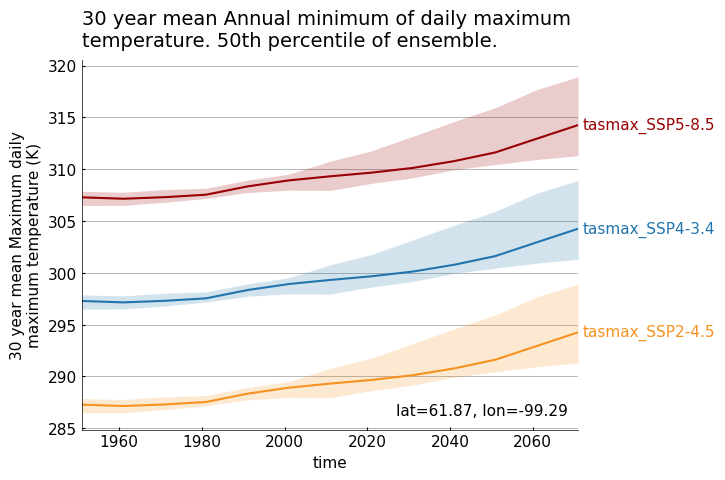

In [9]:
#creating fake scenarios
data = {'tasmax_ssp434': ds_time,
        'tasmax_ssp245': ds_time.copy()-10,
        'tasmax_ssp585': ds_time.copy()+10}

sp.plot.timeseries(data=data, legend='edge')


# Plotting data on maps

The [gridmap](#gridmap) function plots gridded data onto maps built using [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) along with xarray plotting functions. The main arguments of the timeseries() functions are also found in gridmap(), but new ones are introduced to handle map projections and colormap/colorbar options. 

By default, the Lambert Conformal conic projection is used for the basemaps. The projection can be changed using the `projection` argument. The available projections [can be found here](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections). The `transform` argument should be used to specify the data coordinate system. If a transform is not provided, spirograph will look for dimensions named 'lat' and 'lon' or 'rlat' and 'rlon' and return the `ccrs.PlateCaree()` or `ccrs.RotatedPole()` transforms, respectively.  

Features can also be added to the map by passing the names of the [cartopy pre-defined features](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) in a list via the `features` argument (case-insensitively). A nested dictionary can also be passed to `features` in order to apply modifiers to these features, for instance `features = {'coastline': {'scale': '50m', 'color':'grey'}}`.
 
The gridmap() function only accepts one object in its `data` argument, inside a dictionary or not. Datasets are accepted, but only their first variable will be plotted.

/exec/abeaupre/Projects/spirograph/spirograph/matplotlib/plot.py:424: UserWarning: data is xr.Dataset; only the first variable will be used in plot
  warnings.warn(


<GeoAxesSubplot:title={'center':'30 year mean Annual minimum\nof daily maximum temperature.\n50th percentile of ensemble.'}, xlabel='lon [degrees_east]', ylabel='lat [degrees_north]'>

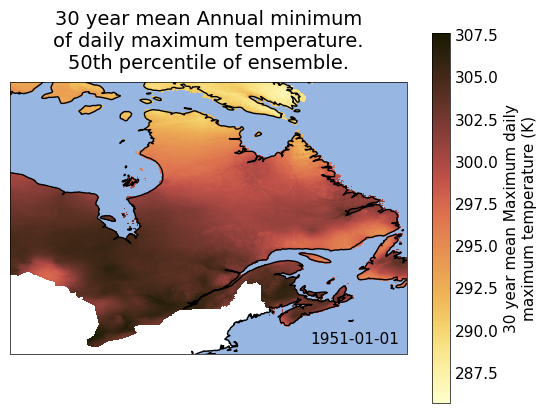

In [10]:
import cartopy.crs as ccrs

#Selecting a time and slicing our starting Dataset
ds_space = opened[['tx_max_p50']].isel(time=0).sel(lat=slice(40,65), lon=slice(-90,-55))

# defining our projection.
projection = ccrs.PlateCarree()

sp.plot.gridmap(ds_space, projection = projection, features = ['coastline','ocean'], frame = True, show_time = True)

### Colormaps and colorbars

The colormap used to display the plots with gridmap() is directly dependent on three arguments:

* `cmap` accepts colormap objects or strings. 

* `divergent` dictates whether or not the colormap will be sequential or divergent. If a number (integer of float) is provided, it becomes the center of the colormap. The default central value is 0.

* `levels=N` will create a discrete colormap of N levels. Otherwise, the colormap will be continuous.

 By default ( if `cmap=None`), spirograph will look for certain variable names in the attributes of the DataArray (`da.name` and `da.history`, in this order) and return a colormap corresponding to the 'group' of this variable, following the [IPCC visual style guide's scheme](https://www.ipcc.ch/site/assets/uploads/2022/09/IPCC_AR6_WGI_VisualStyleGuide_2022.pdf) (see page 11). The groups are displayed in the table below.

|Variable Group|Matching strings|
|:------------:|:--------------:|
| Temperature (temp)        | _tas, tasmin, tasmax, tdps, tg, tn, tx_|
|Precipitation (prec)        |_pr, prc, hurs, huss, rain,<br>precip, precipitation, humidity, evapotranspiration_|
|Wind (wind)        |_sfcWind, ua, uas, vas_|
|Cryosphere (cryo)        |_snw, snd, prsn, siconc, ice_|

Note: The strings shown above will not be recognized as variables if they are part of a longer word, for example 'tas' in 'fantastic'.

The colormaps are built from RGB data be found in the [IPCC-WG1 Github repository](https://github.com/IPCC-WG1/colormaps). When none of the variables names match a group, or when multiple matches are found, the function resorts to the ['Batlow' colormap](https://www.fabiocrameri.ch/batlow/).
 
Strings passed to these arguments can either be names of matplotlib colormaps or names of the IPCC-prescribed colormaps, such as 'temp_div'(divergent colormap for temperature variables) or 'prec_seq.txt' (sequential colormap for precipitation-related variables).


In [ ]:
#change the name of our DataArray for one that inclues 'pr' (precipitation) - this is still the same temperature data
da_pr = ds_space.tx_max_p50.copy()
da_pr.name = 'pr_max_p50'

#diverging colormap with 8 levels, centered at 300
ax = sp.plot.gridmap(da_pr, divergent=300, levels=8, plot_kw={'cbar_kwargs':{'label':'precipitation'}})
ax.set_title('This is still temperature data,\nbut let\'s pretend.')

**Note**: Using the `levels` argument will result in a colormap that is split evenly across the span of the data, without consideration for how 'nice' the intervals are (i.e. the boundaries of the different colors will often fall on numbers with some decimals, that might be totally significant to an audience). To obtain 'nice' intervals, it is possible to use the `levels` argument in `plot_kw`. This might however, and often, result in the number of levels not being exactly the one that is specified. Using both arguments is not recommended.

In [ ]:
#creating the same map, with 'nice' levels. 
ax = sp.plot.gridmap(da_pr, divergent=300, plot_kw={'levels':8, 'cbar_kwargs':{'label':None}})
ax.set_title('This cmap has 6 levels instead of 8,\nbut aren\'t they nice?')

It is also possible to specify your own levels by passing a list to `plot_kw['levels'].

In [ ]:
ax = sp.plot.gridmap(da_pr, plot_kw={'levels':[290,294,298,302], 'cbar_kwargs':{'label':None}})
ax.set_title('Custom levels')

### pcolormesh vs contourf

By default, xarray plots two-dimensional DataArrays using the matplotlib pcolormesh function (see [xarray.plot.pcolormesh](https://docs.xarray.dev/en/stable/generated/xarray.plot.pcolormesh.html#xarray.plot.pcolormesh)). The `contourf` argument in gridmap allows the user to use [xarray.plot.contourf](https://docs.xarray.dev/en/stable/generated/xarray.plot.contourf.html?highlight=xarray.plot.contourf) function instead. This also implies the key-value pairs passed in `plot_kw` are passed to these functions.

At a large scales, both of these functions create practically equivalent plots. However, their inner workings are inheritely different, and these different ways of plotting data become apparent at small scales. 

When using contourf, passing a value in `levels` is equivalent to passing it in `plot_kw['levels']`, meaning the number of levels on the plot might not be exactly the specified value.

In [ ]:
zoomed = ds_space['tx_max_p50'].sel(lat=slice(44,46), lon=slice(-65,-60))

fig, axs = plt.subplots(1,2, figsize=(10,6), subplot_kw= {'projection': ccrs.LambertConformal()})
sp.plot.gridmap(ax = axs[0], data=zoomed, contourf=False,plot_kw={'levels':10, 'add_colorbar':False})
axs[0].set_title('pcolormesh')
sp.plot.gridmap(ax = axs[1],data=zoomed, contourf=True, plot_kw={'levels':10, 'cbar_kwargs':{'shrink':0.5, 'label':None}})
axs[1].set_title('contourf')

# 4. Functions

<a id='timeseries'></a>
## timeseries()

In [ ]:
print(sp.plot.timeseries.__doc__)

<a id='gridmap'></a>
## gridmap()

In [ ]:
print(sp.plot.gridmap.__doc__)